In [20]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df_svm = pd.read_csv("cnn_svm_preds.csv")   
df_hybrid = pd.read_csv("cnn_mlp.csv")      
df_mlp = pd.read_csv("MLP_Results.csv")
df_vgg16 = pd.read_csv("experiments/20251222_142035/test_final_predictions.csv")


In [22]:

df_svm = df_svm.rename(columns={'id': 'id'})
df_svm['id'] = df_svm['id'].astype(int)

df_hybrid = df_hybrid.rename(columns={'id': 'id'})
df_hybrid['id'] = df_hybrid['id'].astype(int)


df_mlp = df_mlp.rename(columns={'ID': 'id'})
df_mlp['id'] = df_mlp['id'].astype(int)

df_vgg16 = df_vgg16.rename(columns={'id': 'id'})
df_vgg16['id'] = df_vgg16['id'].astype(int)

In [23]:
df_svm = df_svm.rename(columns={'prob': 'prob_svm'})
df_hybrid = df_hybrid.rename(columns={'probability': 'prob_hybrid'})
df_mlp = df_mlp.rename(columns={'Predicted Probability': 'prob_mlp'})
df_vgg16 = df_vgg16.rename(columns={'predicted_prob': 'prob_vgg16'})

In [24]:
ensemble_df = df_svm[['id', 'prob_svm']] .merge(df_hybrid[['id', 'prob_hybrid']], on='id', how='inner').merge(df_mlp[['id', 'prob_mlp']], on='id', how='inner').merge(df_vgg16[['id', 'prob_vgg16']], on='id', how='inner')


In [25]:
ensemble_df['ensemble_prob'] = ensemble_df[['prob_svm', 'prob_hybrid', 'prob_mlp','prob_vgg16']].mean(axis=1)
ensemble_df['final_prediction'] = (ensemble_df['ensemble_prob'] > 0.5).astype(int)
ensemble_df['label'] = ensemble_df['final_prediction'].map({0: 'Normal', 1: 'Abnormal'})

In [26]:
ensemble_df.to_csv('Final_Ensemble_Results.csv', index=False)
print("Ensemble successful! Merged matching records.")
print(ensemble_df[['id', 'ensemble_prob', 'label']].head())

Ensemble successful! Merged matching records.
   id  ensemble_prob   label
0  61       0.287823  Normal
1  52       0.343119  Normal
2  11       0.467020  Normal
3  23       0.470372  Normal
4  19       0.425598  Normal


In [27]:
ensemble_df


,id,prob_svm,prob_hybrid,prob_mlp,prob_vgg16,ensemble_prob,final_prediction,label
0,61,0.399489,0.147277,0.104471,0.500054,0.287823,0,Normal
1,52,0.375053,0.170261,0.325998,0.501164,0.343119,0,Normal
2,11,0.496036,0.422983,0.447421,0.501640,0.467020,0,Normal
3,23,0.526466,0.334211,0.518606,0.502204,0.470372,0,Normal
4,19,0.486717,0.445760,0.268034,0.501881,0.425598,0,Normal
5,82,0.627719,0.543704,0.903082,0.500459,0.643741,1,Abnormal
6,21,0.369709,0.305633,0.237303,0.502123,0.353692,0,Normal
7,60,0.432282,0.162402,0.163340,0.501150,0.314794,0,Normal
8,78,0.688127,0.950040,0.985894,0.500392,0.781113,1,Abnormal
9,86,0.686771,0.949651,0.981929,0.500639,0.779747,1,Abnormal


Final Ensemble Accuracy: 70.00%
Total Samples Evaluated: 20
 Detailed Performance Report 
              precision    recall  f1-score   support

      Normal       0.69      0.82      0.75        11
    Abnormal       0.71      0.56      0.62         9

    accuracy                           0.70        20
   macro avg       0.70      0.69      0.69        20
weighted avg       0.70      0.70      0.69        20



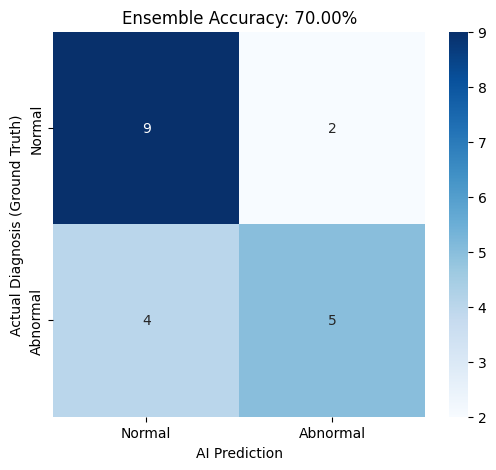

In [28]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


df_labels = pd.read_csv('data/labels.csv')


df_labels.columns = df_labels.columns.str.strip()
df_labels['id'] = df_labels['id'].astype(int)


label_map = {'normal': 0, 'abnormal': 1}
df_labels['ground_truth'] = df_labels['label'].str.lower().str.strip().map(label_map)


final_eval = pd.merge(ensemble_df, df_labels[['id', 'ground_truth']], on='id', how='inner')


y_true = final_eval['ground_truth']
y_pred = final_eval['final_prediction']

# 6. Display Results
if len(final_eval) > 0:
    acc = accuracy_score(y_true, y_pred)
    print(f"Final Ensemble Accuracy: {acc:.2%}")
    print(f"Total Samples Evaluated: {len(final_eval)}")
    
    print(" Detailed Performance Report ")
   
    print(classification_report(y_true, y_pred, target_names=['Normal', 'Abnormal']))

    # 7. Plot the Confusion Matrix
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Normal', 'Abnormal'], 
                yticklabels=['Normal', 'Abnormal'])
    plt.title(f'Ensemble Accuracy: {acc:.2%}')
    plt.ylabel('Actual Diagnosis (Ground Truth)')
    plt.xlabel('AI Prediction')
    plt.show()
else:
    print("Error: No matching IDs found between the models and labels.csv.")